WE HAVE 2 DIFFERENT DATASETS external_loan_history and loans.csv , we need to merge them on basis of foreign key which in our case is creditor_id

We will use vlookup function to merge

Type in the following formula:

=VLOOKUP(creditor_id,'[external_loan_history.csv] loans.csv'!$A:$B, 2, FALSE)

Replace "$A:$B" with the actual range of columns that contains the data you want to merge.

# Importing all python Libraries

In [58]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Explolatory data analysis

In [2]:
#reading csv file
data = pd.read_csv('FinalDataset.csv')

In [3]:
#printing first 5 rows of the dataset
data.head(5)

,loan_id,creditor_id,requested_date,payment_date,due_date,repayment_date,region_id,subdistrict_id,amount,volume,quality,loan_type,date,due_date2,interest,interest_type,tenure,days_past_due
0,6273,471c132b-6534-4b19-93e7-3716c1e0345f,1/4/2018 0:10,1/4/2018 2:39,4/20/2018 7:06,NaN,6,0,200,14.0,73.3,Financing Company,6/30/2017,12/30/2018,46.69,Fixed Interest Rates,548.0,0.0
1,6828,471c132b-6534-4b19-93e7-3716c1e0345f,7/4/2018 0:14,8/4/2018 5:23,4/27/2018 12:37,NaN,6,9,200,13.0,67.6,Financing Company,6/30/2017,12/30/2018,46.69,Fixed Interest Rates,548.0,0.0
2,7005,471c132b-6534-4b19-93e7-3716c1e0345f,8/4/2018 10:37,9/4/2018 8:09,4/28/2018 11:24,NaN,6,36,200,14.0,73.8,Financing Company,6/30/2017,12/30/2018,46.69,Fixed Interest Rates,548.0,0.0
3,7212,471c132b-6534-4b19-93e7-3716c1e0345f,11/4/2018 5:29,12/4/2018 5:34,3/5/2018 9:43,NaN,6,33,200,13.0,73.8,Financing Company,6/30/2017,12/30/2018,46.69,Fixed Interest Rates,548.0,0.0
4,7334,471c132b-6534-4b19-93e7-3716c1e0345f,3/14/2018 14:17,3/15/2018 7:17,5/3/2018 10:30,4/19/2018 5:23,6,13,200,12.0,64.0,Financing Company,6/30/2017,12/30/2018,46.69,Fixed Interest Rates,548.0,0.0


In [4]:
#checking for number of rows,columns
data.shape

(10305, 18)

In [5]:
#checking if there are null values
#true means there are null values , false means no null values 
data.isnull().values.any()

True

In [6]:
#0 means no null values
data.isnull().sum().sum()

36754

In [7]:
#dropping unnecessary columns as they are not needed
data = data.drop(['loan_id','creditor_id','requested_date','payment_date','due_date','repayment_date'
                 ,'date','due_date2'],axis=1)

In [8]:
#checking whether the columns are dropped or not
data.head(5)

,region_id,subdistrict_id,amount,volume,quality,loan_type,interest,interest_type,tenure,days_past_due
0,6,0,200,14.0,73.3,Financing Company,46.69,Fixed Interest Rates,548.0,0.0
1,6,9,200,13.0,67.6,Financing Company,46.69,Fixed Interest Rates,548.0,0.0
2,6,36,200,14.0,73.8,Financing Company,46.69,Fixed Interest Rates,548.0,0.0
3,6,33,200,13.0,73.8,Financing Company,46.69,Fixed Interest Rates,548.0,0.0
4,6,13,200,12.0,64.0,Financing Company,46.69,Fixed Interest Rates,548.0,0.0


In [9]:
#getting info about interest_type
data['interest_type'].value_counts()

Fixed Interest Rates       3983
Floating Interest Rates    2366
Others                      152
Margin                        8
Name: interest_type, dtype: int64

In [10]:
#getting info about loan_type
data['loan_type'].value_counts()

Conventional Commercial Bank    4856
Financing Company               1429
Conventional Rural Bank          224
Name: loan_type, dtype: int64

In [11]:
#getting info about REGION
data['region_id'].value_counts()

6    7040
2    3255
3      10
Name: region_id, dtype: int64

In [12]:
#getting info about SUBDISTRICT
data['subdistrict_id'].value_counts()

38     533
3      473
4      364
49     296
33     287
      ... 
317      1
374      1
275      1
298      1
451      1
Name: subdistrict_id, Length: 377, dtype: int64

In [13]:
#dropping subdistrict id as it won't contribute much
data=data.drop(['subdistrict_id'],axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region_id      10305 non-null  int64  
 1   amount         10305 non-null  int64  
 2   volume         9052 non-null   float64
 3   quality        8980 non-null   float64
 4   loan_type      6509 non-null   object 
 5   interest       6509 non-null   float64
 6   interest_type  6509 non-null   object 
 7   tenure         6509 non-null   float64
 8   days_past_due  6509 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 724.7+ KB


In [15]:
#performing imputation to replace missing values with mean of that column
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region_id      10305 non-null  int64  
 1   amount         10305 non-null  int64  
 2   volume         9052 non-null   float64
 3   quality        8980 non-null   float64
 4   loan_type      6509 non-null   object 
 5   interest       6509 non-null   float64
 6   interest_type  6509 non-null   object 
 7   tenure         6509 non-null   float64
 8   days_past_due  6509 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 724.7+ KB


In [17]:
#performing imputation to replace missing values with median of that column
data = data.fillna(data.median())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\1800650740.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region_id      10305 non-null  int64  
 1   amount         10305 non-null  int64  
 2   volume         10305 non-null  float64
 3   quality        10305 non-null  float64
 4   loan_type      6509 non-null   object 
 5   interest       10305 non-null  float64
 6   interest_type  6509 non-null   object 
 7   tenure         10305 non-null  float64
 8   days_past_due  10305 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 724.7+ KB


In [19]:
#converting interest_type(categorical variables) into numeric values by mapping
data['interest_type'] = data['interest_type'].replace({'Fixed Interest Rates': 1, 'Floating Interest Rates': 0})

In [20]:
#converting loan_type(categorical variables) into numeric values by mapping
data['loan_type'] = data['loan_type'].replace({'Financing Company': 1, 'Conventional Commercial Bank': 0,
                                               'Conventional Rural Bank':2})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region_id      10305 non-null  int64  
 1   amount         10305 non-null  int64  
 2   volume         10305 non-null  float64
 3   quality        10305 non-null  float64
 4   loan_type      6509 non-null   float64
 5   interest       10305 non-null  float64
 6   interest_type  6509 non-null   object 
 7   tenure         10305 non-null  float64
 8   days_past_due  10305 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 724.7+ KB


In [22]:
data.dropna(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 10304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region_id      6509 non-null   int64  
 1   amount         6509 non-null   int64  
 2   volume         6509 non-null   float64
 3   quality        6509 non-null   float64
 4   loan_type      6509 non-null   float64
 5   interest       6509 non-null   float64
 6   interest_type  6509 non-null   object 
 7   tenure         6509 non-null   float64
 8   days_past_due  6509 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 508.5+ KB


In [24]:
data.isnull().values.any()

False

In [25]:
#0 means no null values
data.isnull().sum().sum()

0

NOW THERE ARE NO MISSING VALUES IN OUR DATASET

In [26]:
data.head(5)

,region_id,amount,volume,quality,loan_type,interest,interest_type,tenure,days_past_due
0,6,200,14.0,73.3,1.0,46.69,1,548.0,0.0
1,6,200,13.0,67.6,1.0,46.69,1,548.0,0.0
2,6,200,14.0,73.8,1.0,46.69,1,548.0,0.0
3,6,200,13.0,73.8,1.0,46.69,1,548.0,0.0
4,6,200,12.0,64.0,1.0,46.69,1,548.0,0.0


In [27]:
data['days_past_due'].value_counts()

0.0       5278
5.0        155
4617.0     152
2104.0      94
249.0       84
404.0       76
34.0        71
269.0       53
22.0        52
30.0        46
72.0        42
262.0       38
73.0        35
267.0       35
1.0         26
684.0       23
4.0         21
143.0       21
116.0       20
150.0       15
7.0         15
8.0         15
41.0        14
57.0        14
137.0       12
92.0        10
1770.0       6
1727.0       6
395.0        6
159.0        5
154.0        5
271.0        5
216.0        5
86.0         4
27.0         4
110.0        4
353.0        4
61.0         4
71.0         4
38.0         4
220.0        3
185.0        3
691.0        3
97.0         3
1228.0       3
18.0         2
74.0         2
90.0         2
129.0        1
25.0         1
16.0         1
146.0        1
210.0        1
Name: days_past_due, dtype: int64

In [28]:
#creating three different categories for low risk , medium risk and high risk
data['days_past_due'] = pd.cut(data['days_past_due'], bins=[-1, 5, 50, float('inf')], labels=[0, 1, 2])


In [29]:
data['days_past_due'].value_counts()

0    5480
2     804
1     225
Name: days_past_due, dtype: int64

In [30]:
data.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,region_id,amount,volume,quality,loan_type,interest,tenure
region_id,1.000000,-0.019484,0.093514,-0.461558,-0.126045,-0.118924,0.047993
amount,-0.019484,1.000000,-0.000937,0.029303,0.034066,0.027503,0.015435
volume,0.093514,-0.000937,1.000000,-0.236975,-0.061736,-0.069953,0.030705
quality,-0.461558,0.029303,-0.236975,1.000000,0.079372,0.066894,-0.064784
loan_type,-0.126045,0.034066,-0.061736,0.079372,1.000000,0.347730,-0.000473
interest,-0.118924,0.027503,-0.069953,0.066894,0.347730,1.000000,0.003426
tenure,0.047993,0.015435,0.030705,-0.064784,-0.000473,0.003426,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\3302115227.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


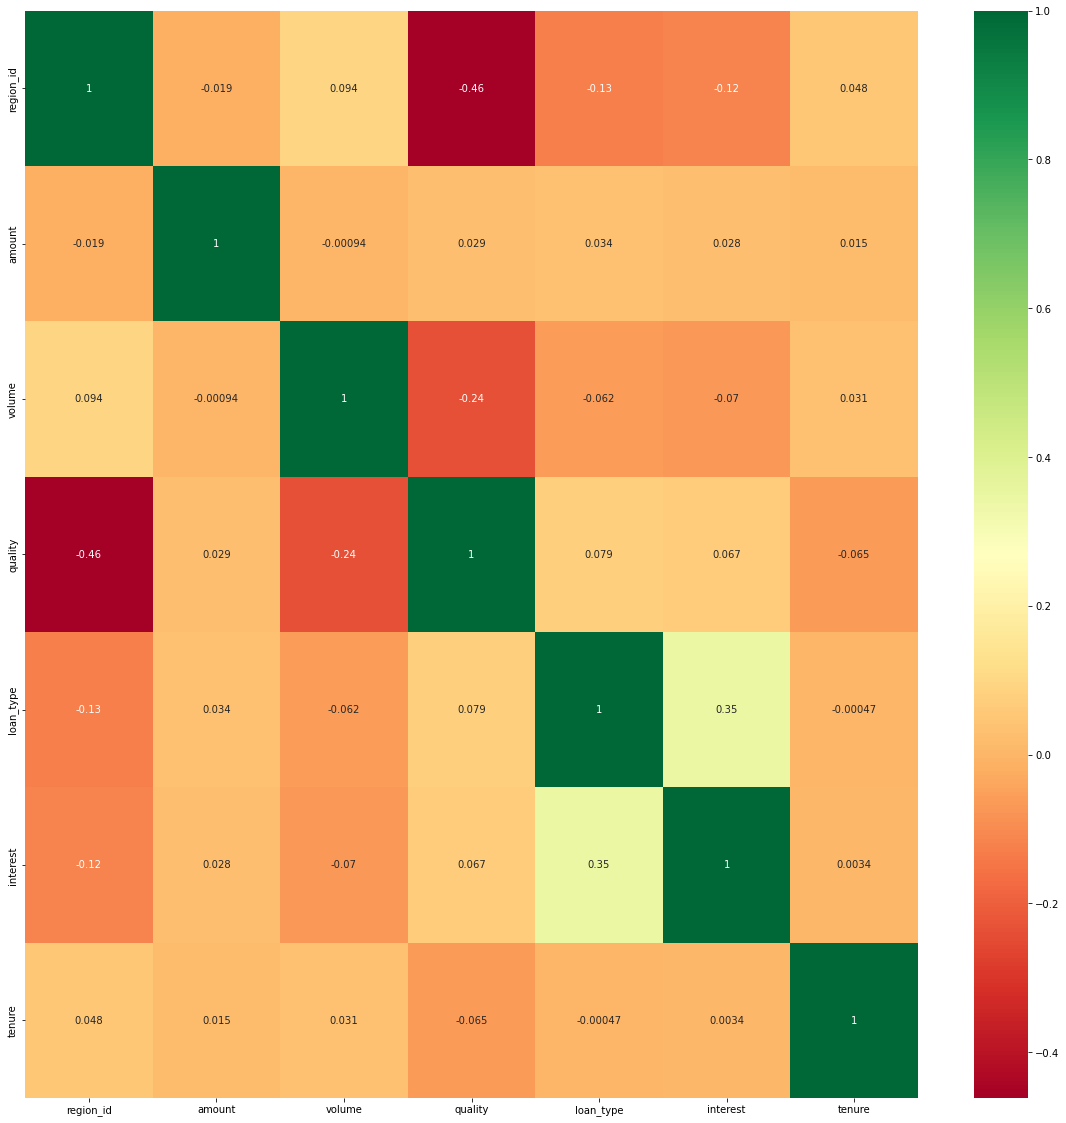

In [31]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [32]:
data['days_past_due'].value_counts()

0    5480
2     804
1     225
Name: days_past_due, dtype: int64

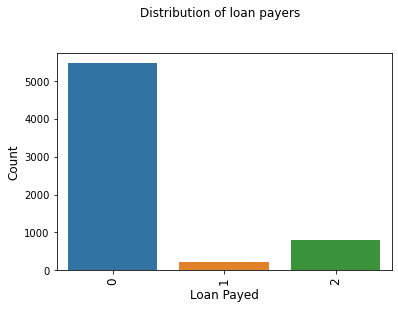

In [33]:
#plotting graph for visualizing number of people who payed loan early vs payed loan late vs payed too late
#0: payed early
#1: payed late
#2: payed too late
ax = sns.countplot(x='days_past_due',   data= data)
plt.xlabel('Loan Payed', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of loan payers  \n\n', size = 12)
plt.show()

# FEATURE ENGINEERING

In [34]:
#function for printing how many values are there in day_past_column with respect to each value in our loan_type column
grouped = data.groupby(['loan_type', 'days_past_due']).size().reset_index(name='count')

# print the count for loan_type and days_past_due combination
for i in [1,0,2]:
    print(f"Code: {i}")
    for j in [0, 1,2]:
        count = grouped.loc[(grouped['loan_type']==i) & (grouped['days_past_due']==j), 'count'].values
        if count.size > 0:
            print(f"Value {j}: {count[0]}")
        else:
            print(f"Value {j}: 0")

Code: 1
Value 0: 936
Value 1: 137
Value 2: 356
Code: 0
Value 0: 4399
Value 1: 41
Value 2: 416
Code: 2
Value 0: 145
Value 1: 47
Value 2: 32


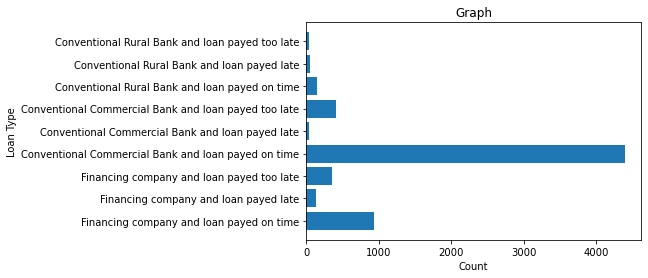

In [35]:
#plotting bar graph
import matplotlib.pyplot as plt
y=['Financing company and loan payed on time', 'Financing company and loan payed late',
   'Financing company and loan payed too late',
   'Conventional Commercial Bank and loan payed on time',
   'Conventional Commercial Bank and loan payed late','Conventional Commercial Bank and loan payed too late',
   'Conventional Rural Bank and loan payed on time',
   'Conventional Rural Bank and loan payed late','Conventional Rural Bank and loan payed too late'
  ]
 
# getting values against each value of y
x=[936,137,356,4399,41,416,145,47,32]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Loan Type")
 
# setting label of x-axis
plt.xlabel("Count")
plt.title("Graph")
plt.show()

FROM THE GRAPH WE CAN OBSERVE THAT PEOPLE WHO TOOK LOAN FROM CONVENTIONAL COMMERCIAL BANK PAYED LOAN ON TIME AS COMPARED TO OTHERS

In [36]:
data['interest_type'].value_counts()

1         3983
0         2366
Others     152
Margin       8
Name: interest_type, dtype: int64

In [37]:
#function for printing how many values are there in day_past_column with respect to each value in our interest_type column
cluster = data.groupby(['interest_type', 'days_past_due']).size().reset_index(name='count')

# print the count for each interest_type and days_past_due combination
for i in [0, 1]:
    print(f"Code: {i}")
    for j in [0, 1,2]:
        count = cluster.loc[(cluster['interest_type']==i) & (cluster['days_past_due']==j), 'count'].values
        if count.size > 0:
            print(f"Value {j}: {count[0]}")
        else:
            print(f"Value {j}: 0")

Code: 0
Value 0: 2153
Value 1: 15
Value 2: 198
Code: 1
Value 0: 3320
Value 1: 210
Value 2: 453


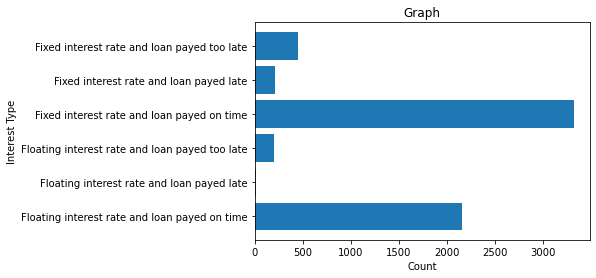

In [38]:
#plotting bar graph
import matplotlib.pyplot as plt
y=['Floating interest rate and loan payed on time', 'Floating interest rate and loan payed late',
   'Floating interest rate and loan payed too late',
   'Fixed interest rate and loan payed on time',
   'Fixed interest rate and loan payed late','Fixed interest rate and loan payed too late']
 
# getting values against each value of y
x=[2153,15,198,3320,210,453]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Interest Type")
 
# setting label of x-axis
plt.xlabel("Count")
plt.title("Graph")
plt.show()

FROM THE GRAPH WE CAN OBSERVE THAT PEOPLE WHO TOOK LOAN WITH FIXED INTEREST RATE PAYED LOAN ON TIME AS COMPARED TO OTHERS

In [39]:
data['region_id'].value_counts()

6    4203
2    2296
3      10
Name: region_id, dtype: int64

In [40]:
#function for printing how many values are there in day_past_column with respect to each value in our region_id column
stack = data.groupby(['region_id', 'days_past_due']).size().reset_index(name='count')

# print the count for each interest_type and days_past_due combination
for i in [6, 2,3]:
    print(f"Code: {i}")
    for j in [0, 1,2]:
        count = stack.loc[(stack['region_id']==i) & (stack['days_past_due']==j), 'count'].values
        if count.size > 0:
            print(f"Value {j}: {count[0]}")
        else:
            print(f"Value {j}: 0")

Code: 6
Value 0: 3576
Value 1: 151
Value 2: 476
Code: 2
Value 0: 1894
Value 1: 74
Value 2: 328
Code: 3
Value 0: 10
Value 1: 0
Value 2: 0


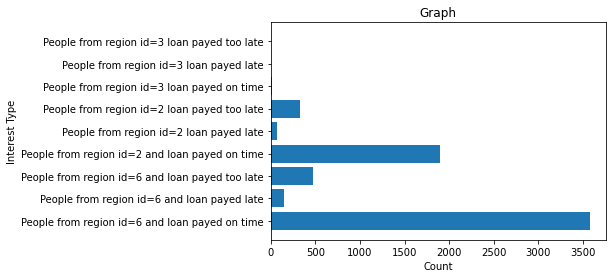

In [41]:
#plotting bar graph
import matplotlib.pyplot as plt
y=['People from region id=6 and loan payed on time', 'People from region id=6 and loan payed late',
   'People from region id=6 and loan payed too late',
   'People from region id=2 and loan payed on time',
   'People from region id=2 loan payed late',
   'People from region id=2 loan payed too late','People from region id=3 loan payed on time',
   'People from region id=3 loan payed late','People from region id=3 loan payed too late']
 
# getting values against each value of y
x=[3576,151,476,1894,74,328,10,0,0]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Interest Type")
 
# setting label of x-axis
plt.xlabel("Count")
plt.title("Graph")
plt.show()

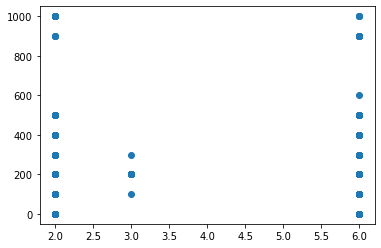

In [42]:
# Scatter plot of region_id vs amount
plt.scatter(data['region_id'],data['amount'])
plt.show()

FROM THE GRAPH WE CAN OBSERVE PEOPLE FROM REGION ID 6 PAYED LOAN ON TIME AS COMPARED TO OTHERS

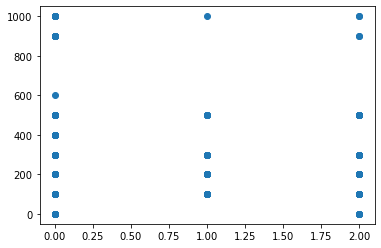

In [43]:
# Scatter plot of days_past_due vs amount
plt.scatter(data['days_past_due'],data['amount'])
plt.show()

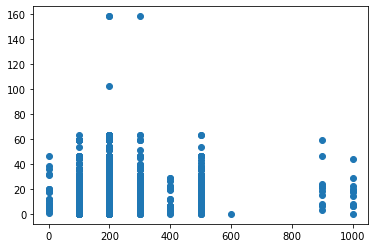

In [44]:
# Scatter plot of amount vs interest
plt.scatter(data['amount'],data['interest'])
plt.show()

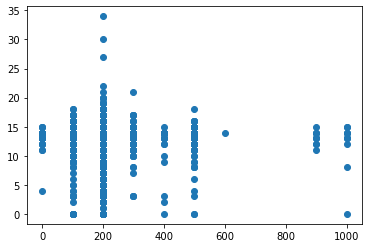

In [45]:
# Scatter plot of amount vs volume
plt.scatter(data['amount'],data['volume'])
plt.show()

# MODEL DEVELOPMENT

In [46]:
#creating feature and predict columns
from sklearn.model_selection import train_test_split
feature_columns = ['region_id','amount', 'volume', 'quality','loan_type','interest','tenure']
predicted_class = ['days_past_due']

In [47]:
#assigning column values
X = data[feature_columns].values
y = data[predicted_class].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [49]:
#importing random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

In [61]:
random_forest_model.fit(X_train, y_train.ravel())

predict_train_data = random_forest_model.predict(X_test)

In [55]:
# Define XGBoost model parameters
params = {
    'objective': 'binary:logistic',  # classification problem
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 50
}

# Create an instance of the XGBoost classifier model
xg_clf = xgb.XGBClassifier(**params)

# Fit the model on training data
xg_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xg_clf.predict(X_test)


# MODEL EVALUATION

In [62]:
from sklearn import metrics

print("Accuracy of random forest model= {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy of random forest model= 0.984


In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of xgboost model: %f" % (accuracy))

Accuracy of xgboost model: 0.938556


In [101]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=random_forest_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1645    1    2]
 [   8   57    1]
 [  20    0  219]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1648
           1       0.98      0.86      0.92        66
           2       0.99      0.92      0.95       239

    accuracy                           0.98      1953
   macro avg       0.98      0.93      0.95      1953
weighted avg       0.98      0.98      0.98      1953



Got an accuracy score of 98.4% for Random Forest classifier model and accuracy score of 933.8% for xgboost model
We select the random forest model for our problem as it gave more accuracy

##TAKING INPUT FROM USER AND PREDICTING LOAN REPAYMENT

In [ ]:
##function to take input
region = int(input("Enter region_id:"))
amount = int(input("Enter amount:"))
volume = float(input("Enter volume:"))
quality = float(input("Enter quality:"))
loan_type = int(input("Enter loan_type:"))
interest = float(input("Enter Interest:"))
tenure = float(input("Enter tenure:"))

user_input = [region,amount, volume, quality, loan_type, interest,tenure] 

result = random_forest_model.predict([user_input])[0]


if(result==0):
    print("User will pay loan on time , there is no risk")

if(result==1):
    print("Medium risk that user will not pay on time")

else:
    print("High risk that user wont pay on time")

# EXPLAINING OVERALL APPROACH AND MODEL EXPLANATION

EDA:
We did exploratory data analysis on the dataset. First we checked for null values and replaced them with mode and median as suitable. Loan id , creditor id , subdistrict id and columns related to dates were not contributing in finding out risk so we had to drop them. 
We then transformed loan type, region id and interest type columns into categorical variables as they had relation with risk in giving loans. We plotted graphs to analyze the impact.
Risk in lending loan was related to days past due column as more the days after due date , more the risk in lending loan , so we selected days_past_due as our target column. We categorized the risk into 3 levels : low , medium and high. Days past due between 0-5 were categorized as low  risk , 5-50 as medium risk and above 50 as high risk.Remaining columns were selected as feature columns.

MODEL:
Random forest is a popular ensemble learning method used for classification, regression, and other machine learning tasks. The basic idea behind a random forest model is to build a collection of decision trees, where each tree is trained on a random subset of the data and a random subset of the features. This randomness helps to reduce overfitting and improve the generalization performance of the model.

To create a random forest model for your dataset, you would first need to split your data into a training set and a test set. You would then train the random forest model on the training data using an appropriate number of trees and other hyperparameters, such as the maximum depth of each tree, the minimum number of samples required to split a node, and the number of features to consider when looking for the best split. Once the model is trained, you can use it to make predictions on the test data and evaluate its performance using appropriate metrics, such as accuracy, precision, recall, or F1-score, depending on the type of problem you are solving.

One of the advantages of random forest models is that they can handle large datasets with many features and complex relationships between the features and the target variable. They are also relatively easy to use and interpret, since they provide information about feature importance and can be visualized as a collection of decision trees. However, they can be computationally expensive to train and may not always perform well on datasets with imbalanced classes or noisy data. Overall, random forest models can be a powerful tool for building accurate and robust machine learning models, and may be a good choice for your dataset if it fits the characteristics of the method.